### Mencari metode cleaning terbaik menggunakan model RandomForestClassifier + feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Dataset dengan metode cleaning Interpolasi, modus, dan zscore

#### Percobaan 1 - tanpa drop fitur

In [2]:
df_knn = pd.read_csv('df_InterP_mode_zscore.csv')

In [4]:
df_knn.columns

Index(['Unnamed: 0', 'date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x',
       'ddd_x', 'ff_avg', 'RR', 'ddd_car', 'region_name', 'flood'],
      dtype='object')

In [5]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6308 non-null   int64  
 1   date         6308 non-null   object 
 2   Tn           6308 non-null   float64
 3   Tx           6308 non-null   float64
 4   Tavg         6308 non-null   float64
 5   RH_avg       6308 non-null   float64
 6   ss           6308 non-null   float64
 7   ff_x         6308 non-null   float64
 8   ddd_x        6308 non-null   float64
 9   ff_avg       6308 non-null   float64
 10  RR           6308 non-null   float64
 11  ddd_car      6308 non-null   object 
 12  region_name  6308 non-null   object 
 13  flood        6308 non-null   int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 690.1+ KB


In [7]:
df_knn = df_knn.drop(columns=['Unnamed: 0'], axis=1)

In [8]:
df_knn_copy = df_knn.copy()

In [9]:
df_knn.iloc[:,1:12]

,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,RR,ddd_car,region_name
0,26.0,34.8,28.6,81.0,5.8,5.0,280.0,2.0,9.239964,S,Jakarta Selatan
1,25.6,33.2,27.0,88.0,8.7,4.0,290.0,2.0,1.600000,W,Jakarta Selatan
2,24.4,34.9,28.1,80.0,5.4,4.0,280.0,2.0,33.800000,SW,Jakarta Selatan
3,24.8,33.6,29.2,81.0,6.6,3.0,200.0,1.0,23.800000,S,Jakarta Selatan
4,25.8,33.6,26.7,91.0,3.2,3.0,180.0,1.0,13.800000,S,Jakarta Selatan
...,...,...,...,...,...,...,...,...,...,...,...
6303,23.8,32.0,28.0,70.0,0.2,12.0,180.0,5.0,2.300000,W,Jakarta Timur
6304,24.0,33.4,28.5,69.0,0.2,14.0,250.0,3.0,4.200000,SE,Jakarta Timur
6305,25.2,33.4,28.7,70.0,0.2,14.0,120.0,5.0,6.100000,SW,Jakarta Timur
6306,24.0,34.4,30.0,64.0,0.2,14.0,240.0,5.0,8.000000,W,Jakarta Timur


In [24]:
df_train = df_knn.iloc[:,1:12]
df_target = df_knn['flood']

In [25]:
df_train_dummied = pd.get_dummies(df_train, columns=['ddd_car', 'region_name'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_train_dummied, df_target, test_size=0.2, random_state=42)

In [27]:
y_test.value_counts()

flood
0    1154
1     108
Name: count, dtype: int64

In [13]:
rf1 = RandomForestClassifier()

In [14]:
model1 = rf1.fit(X_train, y_train)

In [15]:
model1_predict = model1.predict(X_test)

In [16]:
ac1 = accuracy_score(y_test, model1_predict)

### Hasil akurasi tanpa melakukan drop fitur satupun

In [17]:
print('Nilai metrik accuracy metode cleaning ke-1 : ', ac1)

Nilai metrik accuracy metode cleaning ke-1 :  0.9120443740095087


#### Percobaan 2 - drop fitur ss

In [18]:
df_train_2 = df_train.drop(columns=['ss'], axis=1)
df_target = df_knn['flood']

df_train_dummied_2 = pd.get_dummies(df_train_2, columns=['ddd_car', 'region_name'])
X_train, X_test, y_train, y_test = train_test_split(df_train_dummied_2, df_target, test_size=0.2, random_state=42)

In [19]:
rf2 = RandomForestClassifier()
model1 = rf1.fit(X_train, y_train)
model1_predict = model1.predict(X_test)
ac2 = accuracy_score(y_test, model1_predict)

In [20]:
print('Nilai metrik accuracy metode cleaning ke-2 : ', ac2)

Nilai metrik accuracy metode cleaning ke-2 :  0.9144215530903328


Karena nilai akurasi menjadi turun, itu artinya fitur ss memiliki pengaruh terhadap data target

In [49]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df_train_dummied, df_target)

In [50]:
X_resampled_2 = X_resampled.drop(columns=['Tn','ff_x'], axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf3 = RandomForestClassifier()
model3 = rf3.fit(X_train, y_train)
model3_predict = model3.predict(X_test)
ac3 = accuracy_score(y_test, model3_predict)

print('Nilai metrik accuracy metode cleaning ke-3 : ', ac3)

Nilai metrik accuracy metode cleaning ke-3 :  0.9837119588512645


In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)

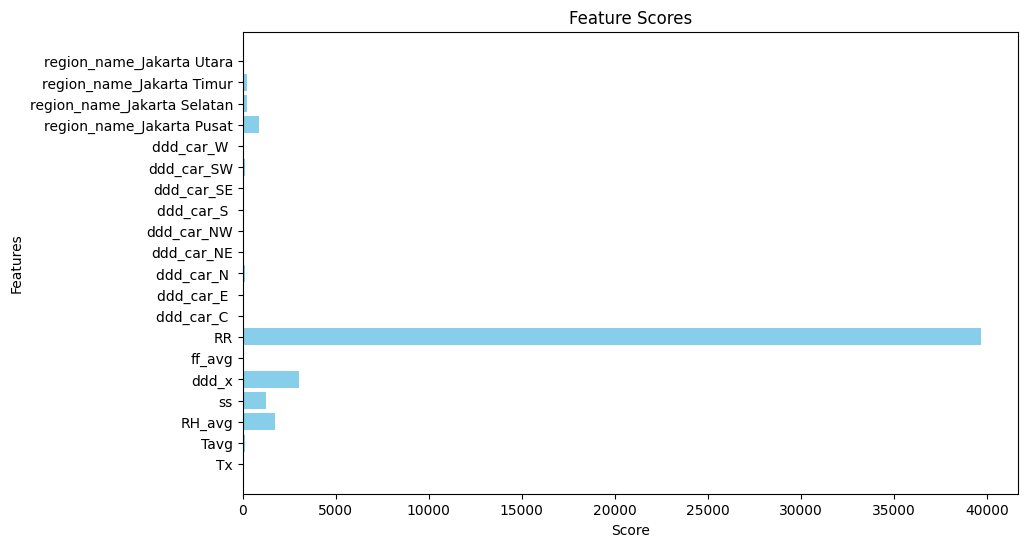

In [40]:
scores = select_feature.scores_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Scores')
plt.show()

In [47]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='f1')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 18
Best features : Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'RR',
       'ddd_car_C ', 'ddd_car_E ', 'ddd_car_N ', 'ddd_car_SW', 'ddd_car_W ',
       'region_name_Jakarta Pusat', 'region_name_Jakarta Selatan',
       'region_name_Jakarta Timur', 'region_name_Jakarta Utara'],
      dtype='object')


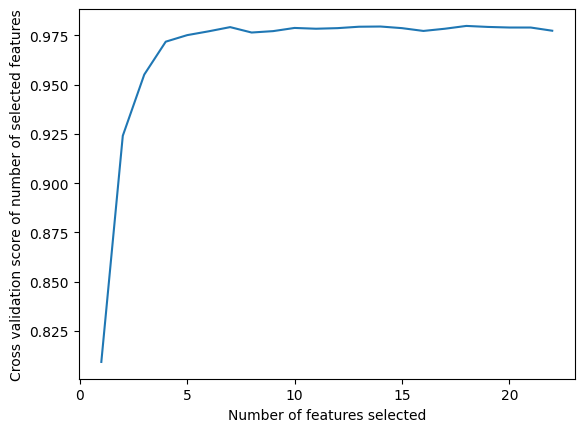

In [48]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()